**Name:** Rodrigo Monteiro de Moraes de Arruda Falcão



# Assignment 2 - Exploratory Data Analysis (EDA)

When you first get your data, it’s very tempting to immediately begin fitting models and assessing how they perform. However, before you begin modeling, it’s absolutely essential to explore the structure of the data and the relationships between the variables in the data set.

Do a detailed EDA of the **ames_train** data set, to learn about the structure of the data and the relationships between the variables in the data set . Your EDA should involve creating and reviewing many plots/graphs and considering the patterns and relationships you see.

You may find out that the data could use some cleaning.

After you have explored completely, make sure you create at least four graphs/plots that you found most informative during your EDA process, and briefly explain what you learned from each (why you found each informative).

PS: notice that the first column is in index, you might not need to import it



In [33]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None 

In [2]:
mustDropCols = []

dfTrain = pd.read_csv("./ames_train.csv", sep=";")
display(dfTrain.head())
dfTrain = dfTrain.iloc[:, 1:]
display(dfTrain.head())

,Unnamed: 0,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,40000,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,40001,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,40002,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,40003,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,40004,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,40000,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,40001,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,40002,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,40003,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,40004,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


**Handling Outliers**

In [3]:
dfTrain.loc[:,dfTrain.dtypes == "int64"] = dfTrain.loc[:,dfTrain.dtypes == "int64"].astype("float64")

df_numeric = dfTrain.loc[:,dfTrain.dtypes == "float64"]

df_numeric.drop(columns=['price'], inplace=True)

dfTrain.drop(columns=df_numeric.columns, inplace=True)
outCond = ((df_numeric < df_numeric.quantile(0.05)) | (df_numeric > df_numeric.quantile(0.95)))
print(outCond)
df_numeric.mask(outCond, np.nan, axis=0, inplace=True)

dfTrain = pd.concat([df_numeric, dfTrain], axis=1)

lowerBound = dfTrain['price'].quantile(0.05)
upperBound = dfTrain['price'].quantile(0.95)

dfTrain.loc[dfTrain['price'] < lowerBound, 'price'] = lowerBound
dfTrain.loc[dfTrain['price'] > upperBound, 'price'] = upperBound

display(dfTrain.info())
display(dfTrain.head())


      PID   area  MS.SubClass  Lot.Frontage  Lot.Area  Overall.Qual  \
0    True  False        False         False     False         False   
1    True  False        False         False     False         False   
2    True  False        False         False     False         False   
3    True  False        False         False     False         False   
4    True  False        False         False     False         False   
..    ...    ...          ...           ...       ...           ...   
995  True  False        False         False     False         False   
996  True  False        False         False     False         False   
997  True  False        False         False     False         False   
998  True  False        False         False     False         False   
999  True  False        False         False     False         False   

     Overall.Cond  Year.Built  Year.Remod.Add  Mas.Vnr.Area  BsmtFin.SF.1  \
0           False       False           False         False         Fa

None

,PID,area,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,price,MS.Zoning,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,Heating,Heating.QC,Central.Air,Electrical,Kitchen.Qual,Functional,Fireplace.Qu,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Pool.QC,Fence,Misc.Feature,Sale.Type,Sale.Condition
0,NaN,856.0,30.0,NaN,7890.0,6.0,6.0,1939.0,1950.0,0.0,238.0,0.0,618.0,856.0,856.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,1.0,1939.0,2.0,399.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,3.0,2010.0,126000.0,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,NaN,1049.0,120.0,42.0,4235.0,5.0,5.0,1984.0,1984.0,149.0,552.0,393.0,104.0,1049.0,1049.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1984.0,1.0,266.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0,139500.0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,NaN,1001.0,30.0,60.0,6060.0,5.0,NaN,1930.0,2007.0,0.0,737.0,0.0,100.0,837.0,1001.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1930.0,1.0,216.0,154.0,0.0,42.0,NaN,0.0,0.0,0.0,11.0,2007.0,124900.0,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Detchd,Unf,TA,Po,N,NaN,NaN,NaN,WD,Normal
3,NaN,1039.0,70.0,80.0,8146.0,4.0,8.0,NaN,2003.0,0.0,0.0,0.0,405.0,NaN,717.0,322.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,0.0,1940.0,1.0,281.0,0.0,0.0,168.0,0.0,111.0,0.0,0.0,5.0,2009.0,114000.0,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,N,NaN,NaN,NaN,WD,Normal
4,NaN,1665.0,60.0,70.0,8400.0,8.0,6.0,2001.0,2001.0,0.0,643.0,0.0,167.0,810.0,810.0,855.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,0.0,2001.0,2.0,528.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,11.0,2009.0,227000.0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


**Handling NA**

Pool.QC            99.7
Misc.Feature       97.1
Alley              93.3
Fence              79.8
Fireplace.Qu       49.1
Lot.Frontage       24.6
Garage.Yr.Blt      12.3
Garage.Area        10.1
X1st.Flr.SF        10.0
area               10.0
PID                10.0
Lot.Area           10.0
Total.Bsmt.SF       9.9
Mo.Sold             8.4
Year.Built          7.2
Bedroom.AbvGr       7.0
Overall.Qual        6.7
Mas.Vnr.Area        5.7
TotRms.AbvGrd       5.5
Garage.Cars         5.4
Bsmt.Unf.SF         5.1
BsmtFin.SF.2        5.1
BsmtFin.SF.1        5.1
X2nd.Flr.SF         5.0
Open.Porch.SF       5.0
Enclosed.Porch      5.0
Screen.Porch        5.0
Wood.Deck.SF        4.9
Garage.Cond         4.8
Garage.Finish       4.8
Garage.Qual         4.8
Garage.Type         4.6
Year.Remod.Add      4.4
Kitchen.AbvGr       4.1
Overall.Cond        3.2
Misc.Val            2.9
MS.SubClass         2.6
Bsmt.Exposure       2.3
Bsmt.Qual           2.2
BsmtFin.Type.1      2.2
BsmtFin.Type.2      2.2
Bsmt.Cond       

"Columns with more than 45% NaN: ['Pool.QC', 'Misc.Feature', 'Alley', 'Fence', 'Fireplace.Qu']"

<AxesSubplot:xlabel='Lot.Frontage', ylabel='Count'>

<AxesSubplot:xlabel='Garage.Yr.Blt', ylabel='Count'>

<AxesSubplot:xlabel='Garage.Area', ylabel='Count'>

<AxesSubplot:xlabel='X1st.Flr.SF', ylabel='Count'>

<AxesSubplot:xlabel='area', ylabel='Count'>

<AxesSubplot:xlabel='PID', ylabel='Count'>

<AxesSubplot:xlabel='Lot.Area', ylabel='Count'>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              1000 non-null   float64
 1   area             1000 non-null   float64
 2   MS.SubClass      1000 non-null   float64
 3   Lot.Frontage     1000 non-null   float64
 4   Lot.Area         1000 non-null   float64
 5   Overall.Qual     1000 non-null   float64
 6   Overall.Cond     1000 non-null   float64
 7   Year.Built       1000 non-null   float64
 8   Year.Remod.Add   1000 non-null   float64
 9   Mas.Vnr.Area     1000 non-null   float64
 10  BsmtFin.SF.1     1000 non-null   float64
 11  BsmtFin.SF.2     1000 non-null   float64
 12  Bsmt.Unf.SF      1000 non-null   float64
 13  Total.Bsmt.SF    1000 non-null   float64
 14  X1st.Flr.SF      1000 non-null   float64
 15  X2nd.Flr.SF      1000 non-null   float64
 16  Low.Qual.Fin.SF  1000 non-null   float64
 17  Bsmt.Full.Bath 

None

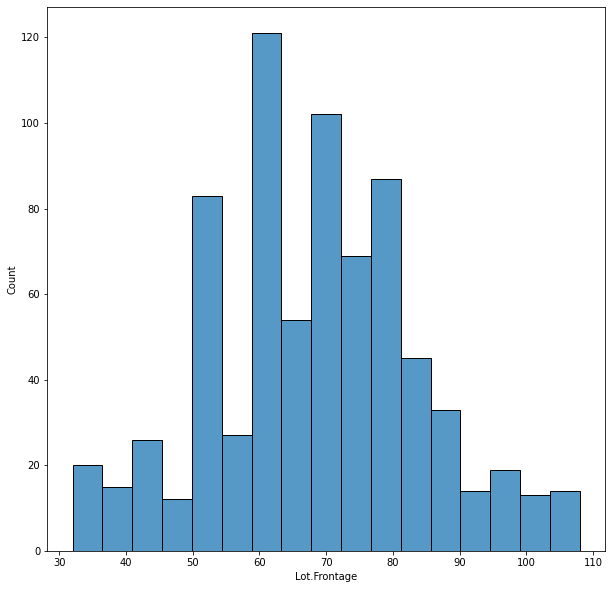

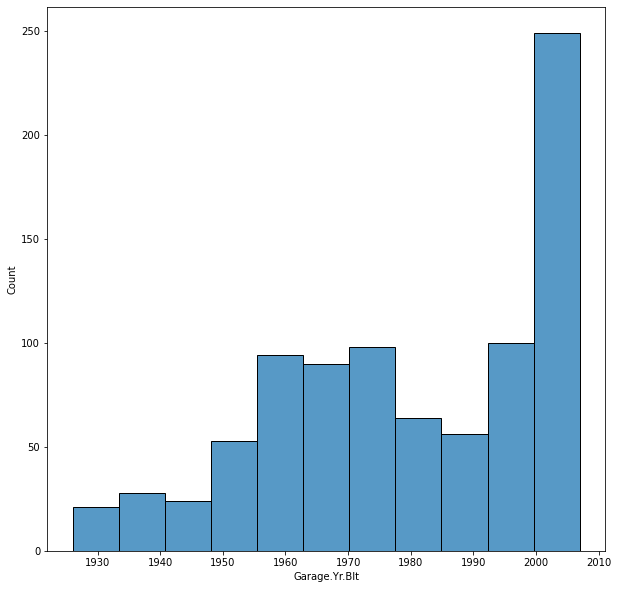

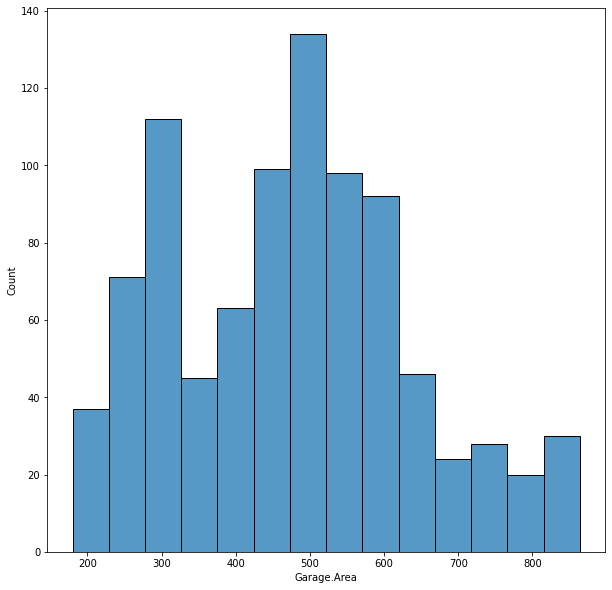

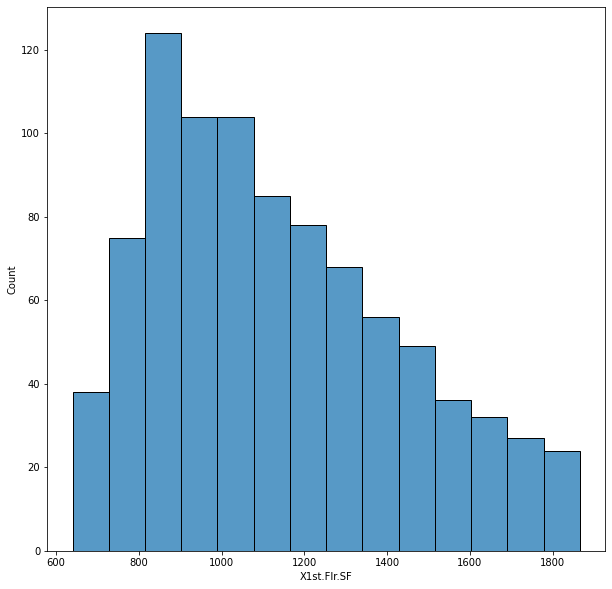

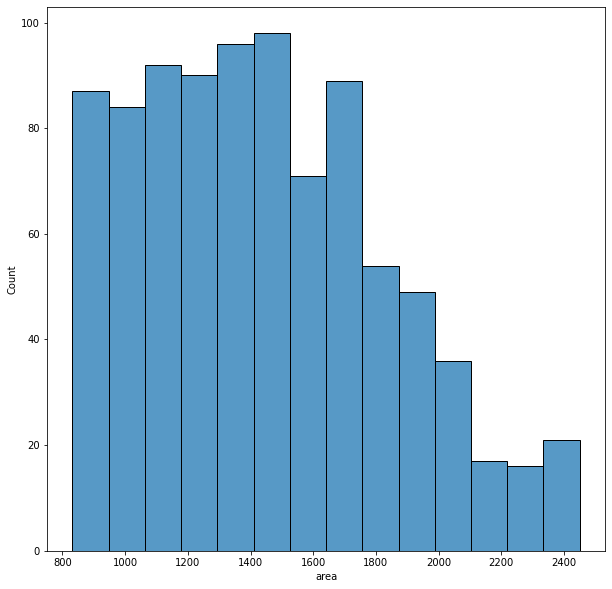

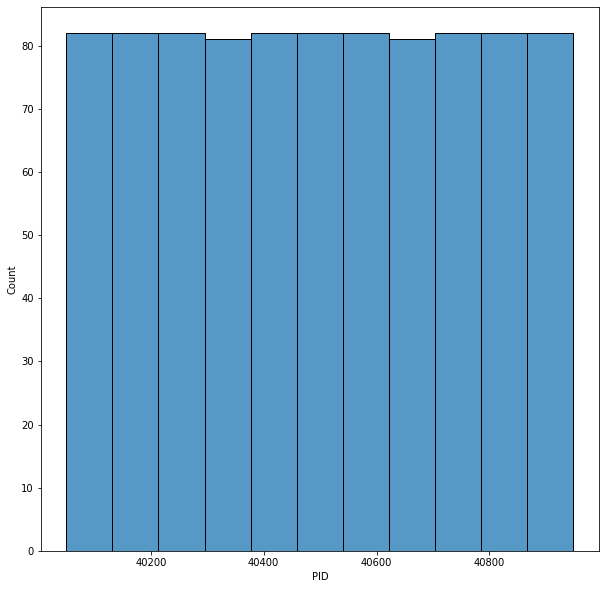

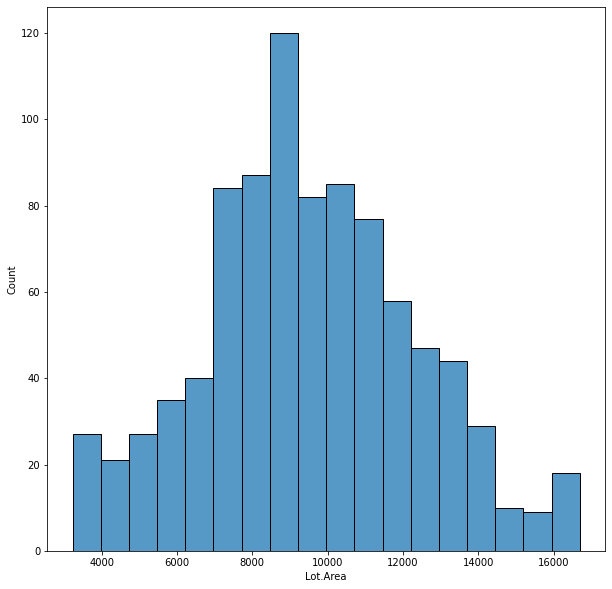

In [4]:
checkNA = dfTrain.isnull().sum() / dfTrain.shape[0] * 100
checkNA.sort_values(ascending=False, inplace=True)
display(checkNA)
colsDrop = list(checkNA.loc[checkNA >= 45].index)
mustDropCols = [*mustDropCols, *colsDrop]
display("Columns with more than 45% NaN: " + str(colsDrop))
dfTrain.drop(columns=colsDrop, inplace=True)

dfTrain.drop_duplicates(inplace=True)
plt.figure(figsize=(10,10))
display(sns.histplot(x= dfTrain['Lot.Frontage']))
plt.figure(figsize=(10,10))
display(sns.histplot(x= dfTrain['Garage.Yr.Blt']))
plt.figure(figsize=(10,10))
display(sns.histplot(x= dfTrain['Garage.Area']))
plt.figure(figsize=(10,10))
display(sns.histplot(x= dfTrain['X1st.Flr.SF']))
plt.figure(figsize=(10,10))
display(sns.histplot(x= dfTrain['area']))
plt.figure(figsize=(10,10))
display(sns.histplot(x= dfTrain['PID']))
plt.figure(figsize=(10,10))
display(sns.histplot(x= dfTrain['Lot.Area']))

def fillNAwithMean(df):
    df.fillna(value=df.mean(), inplace=True)

def fillNAwithMedian(df):
    df.fillna(value=df.median(), inplace=True)

fillNAwithMean(dfTrain['Lot.Frontage'])
fillNAwithMedian(dfTrain['Garage.Yr.Blt'])
fillNAwithMean(dfTrain['Garage.Area'])
fillNAwithMedian(dfTrain['X1st.Flr.SF'])
fillNAwithMedian(dfTrain['area'])
fillNAwithMean(dfTrain['PID'])
fillNAwithMedian(dfTrain['Lot.Area'])
dfTrain.fillna(value= -1, inplace=True)

display(dfTrain.info())

**Cast String Features to Category**

In [5]:
display(dfTrain.info())
dfTrain.loc[:,dfTrain.dtypes == "object"] = dfTrain.loc[:,dfTrain.dtypes == "object"].astype("category")
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              1000 non-null   float64
 1   area             1000 non-null   float64
 2   MS.SubClass      1000 non-null   float64
 3   Lot.Frontage     1000 non-null   float64
 4   Lot.Area         1000 non-null   float64
 5   Overall.Qual     1000 non-null   float64
 6   Overall.Cond     1000 non-null   float64
 7   Year.Built       1000 non-null   float64
 8   Year.Remod.Add   1000 non-null   float64
 9   Mas.Vnr.Area     1000 non-null   float64
 10  BsmtFin.SF.1     1000 non-null   float64
 11  BsmtFin.SF.2     1000 non-null   float64
 12  Bsmt.Unf.SF      1000 non-null   float64
 13  Total.Bsmt.SF    1000 non-null   float64
 14  X1st.Flr.SF      1000 non-null   float64
 15  X2nd.Flr.SF      1000 non-null   float64
 16  Low.Qual.Fin.SF  1000 non-null   float64
 17  Bsmt.Full.Bath 

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PID              1000 non-null   float64 
 1   area             1000 non-null   float64 
 2   MS.SubClass      1000 non-null   float64 
 3   Lot.Frontage     1000 non-null   float64 
 4   Lot.Area         1000 non-null   float64 
 5   Overall.Qual     1000 non-null   float64 
 6   Overall.Cond     1000 non-null   float64 
 7   Year.Built       1000 non-null   float64 
 8   Year.Remod.Add   1000 non-null   float64 
 9   Mas.Vnr.Area     1000 non-null   float64 
 10  BsmtFin.SF.1     1000 non-null   float64 
 11  BsmtFin.SF.2     1000 non-null   float64 
 12  Bsmt.Unf.SF      1000 non-null   float64 
 13  Total.Bsmt.SF    1000 non-null   float64 
 14  X1st.Flr.SF      1000 non-null   float64 
 15  X2nd.Flr.SF      1000 non-null   float64 
 16  Low.Qual.Fin.SF  1000 non-null   float64 
 

**Handling Low Variance Features**

In [6]:
stringCols = list(dfTrain.dtypes.loc[dfTrain.dtypes == "category"].index)
sel = VarianceThreshold(0.1)
sel.fit(dfTrain.drop(columns=stringCols))
featIn = set(sel.feature_names_in_)
featOut = sel.get_feature_names_out()
featuresOut = [*stringCols, *list(featOut)]

dfTrain = dfTrain.loc[:, featuresOut]
varDrop = list(featIn - set(featOut))
mustDropCols = [*mustDropCols, *varDrop]
display("Dropping Numeric Columns with low variance: " + str(varDrop))
display(dfTrain)

"Dropping Numeric Columns with low variance: ['X3Ssn.Porch', 'Low.Qual.Fin.SF', 'Pool.Area', 'Misc.Val', 'Bsmt.Half.Bath']"

,MS.Zoning,Street,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.Type.2,Heating,Heating.QC,Central.Air,Electrical,Kitchen.Qual,Functional,Garage.Type,Garage.Finish,Garage.Qual,Garage.Cond,Paved.Drive,Sale.Type,Sale.Condition,PID,area,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Bsmt.Full.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,Screen.Porch,Mo.Sold,Yr.Sold,price
0,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal,40499.5,856.0,30.0,68.06366,7890.0,6.0,6.0,1939.0,1950.0,0.0,238.0,0.0,618.0,856.0,856.0,0.0,1.0,1.0,0.0,2.0,1.0,4.0,1.0,1939.0,2.0,399.000000,0.0,0.0,0.0,-1.0,3.0,2010.0,126000.0
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,40499.5,1049.0,120.0,42.00000,4235.0,5.0,5.0,1984.0,1984.0,149.0,552.0,393.0,104.0,1049.0,1049.0,0.0,1.0,2.0,0.0,2.0,1.0,5.0,0.0,1984.0,1.0,266.000000,0.0,105.0,0.0,0.0,2.0,2009.0,139500.0
2,C (all),Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,Po,N,WD,Normal,40499.5,1001.0,30.0,60.00000,6060.0,5.0,-1.0,1930.0,2007.0,0.0,737.0,0.0,100.0,837.0,1001.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1930.0,1.0,216.000000,154.0,0.0,42.0,0.0,11.0,2007.0,124900.0
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD,Normal,40499.5,1039.0,70.0,80.00000,8146.0,4.0,8.0,-1.0,2003.0,0.0,0.0,0.0,405.0,-1.0,717.0,322.0,0.0,1.0,0.0,2.0,1.0,6.0,0.0,1940.0,1.0,281.000000,0.0,0.0,168.0,111.0,5.0,2009.0,114000.0
4,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,40499.5,1665.0,60.0,70.00000,8400.0,8.0,6.0,2001.0,2001.0,0.0,643.0,0.0,167.0,810.0,810.0,855.0,1.0,2.0,1.0,3.0,1.0,6.0,0.0,2001.0,2.0,528.000000,0.0,45.0,0.0,0.0,11.0,2009.0,227000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,40499.5,848.0,120.0,68.06366,4426.0,6.0,5.0,2004.0,2004.0,205.0,662.0,0.0,186.0,848.0,848.0,0.0,1.0,1.0,0.0,-1.0,1.0,-1.0,0.0,2004.0,2.0,420.000000,140.0,0.0,0.0,0.0,2.0,2008.0,145000.0
996,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,New,Partial,40499.5,1576.0,60.0,65.00000,8125.0,7.0,5.0,2006.0,2006.0,0.0,0.0,0.0,770.0,770.0,778.0,798.0,0.0,2.0,1.0,3.0,1.0,6.0,0.0,2006.0,2.0,614.000000,0.0,50.0,0.0,0.0,8.0,2006.0,197000.0
997,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,-1,-1,-1,-1,Y,Oth,Abnorml,40499.5,1728.0,90.0,98.00000,13260.0,5.0,6.0,1962.0,2001.0,144.0,-1.0,0.0,228.0,1728.0,1728.0,0.0,-1.0,2.0,0.0,-1.0,-1.0

**Handling High Correlated Numeric Features**

<AxesSubplot:>

'Features to be dropped: []'

(1000, 71)

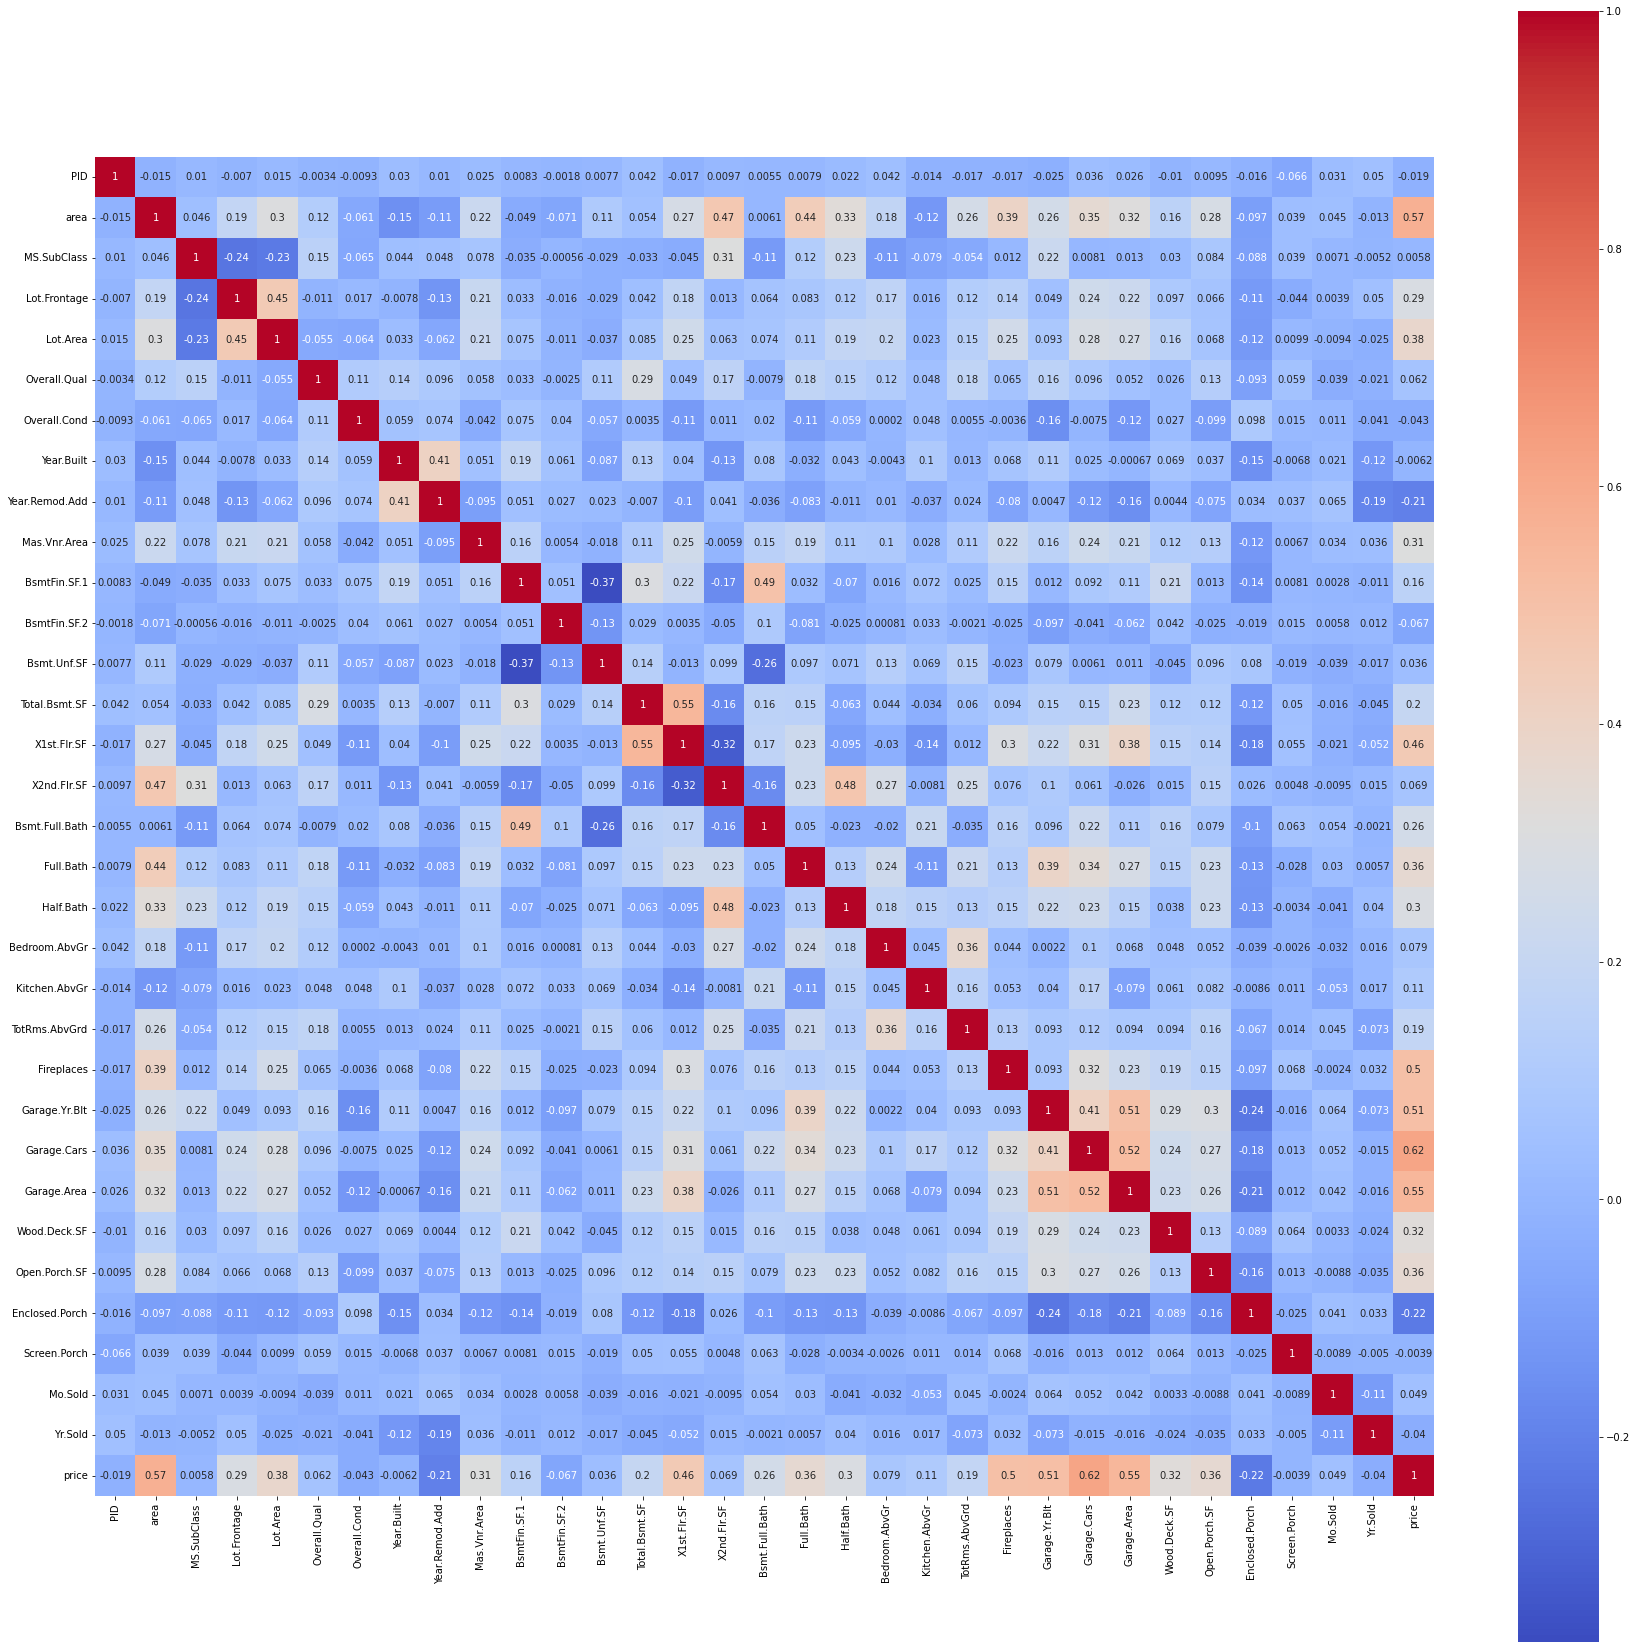

In [7]:
correlation_matrix = dfTrain.corr()
plt.figure(figsize=(30,30))
display(sns.heatmap(correlation_matrix, annot=True,cmap= 'coolwarm', square=True))

correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

correlated_features = list(correlated_features)
display("Features to be dropped: "+ str(correlated_features))
mustDropCols = [*mustDropCols, *correlated_features]

dfTrain.drop(columns=correlated_features, inplace=True)

display(dfTrain.shape)

**One-Hot Encoding**

In [8]:
df_categorical = dfTrain.loc[:,dfTrain.dtypes == "category"]
df_numeric = dfTrain.loc[:,dfTrain.dtypes == "float64"]

df_categorical_encoded = pd.get_dummies(df_categorical)

dfTrain = pd.concat([df_numeric, df_categorical_encoded], axis=1)
display(dfTrain.head())
display(dfTrain.shape)

,PID,area,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Bsmt.Full.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,Screen.Porch,Mo.Sold,Yr.Sold,price,MS.Zoning_C (all),MS.Zoning_FV,MS.Zoning_I (all),MS.Zoning_RH,MS.Zoning_RL,MS.Zoning_RM,Street_Grvl,Street_Pave,Lot.Shape_IR1,Lot.Shape_IR2,Lot.Shape_IR3,Lot.Shape_Reg,Land.Contour_Bnk,Land.Contour_HLS,Land.Contour_Low,Land.Contour_Lvl,Utilities_AllPub,Lot.Config_Corner,Lot.Config_CulDSac,Lot.Config_FR2,Lot.Config_FR3,Lot.Config_Inside,Land.Slope_Gtl,Land.Slope_Mod,Land.Slope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition.1_Artery,Condition.1_Feedr,Condition.1_Norm,Condition.1_PosA,Condition.1_PosN,Condition.1_RRAe,Condition.1_RRAn,Condition.1_RRNe,Condition.1_RRNn,Condition.2_Artery,Condition.2_Feedr,Condition.2_Norm,Condition.2_PosA,Condition.2_PosN,Condition.2_RRNn,Bldg.Type_1Fam,Bldg.Type_2fmCon,Bldg.Type_Duplex,Bldg.Type_Twnhs,Bldg.Type_TwnhsE,House.Style_1.5Fin,House.Style_1.5Unf,House.Style_1Story,House.Style_2.5Unf,House.Style_2Story,House.Style_SFoyer,House.Style_SLvl,Roof.Style_Flat,Roof.Style_Gable,Roof.Style_Gambrel,Roof.Style_Hip,Roof.Style_Mansard,Roof.Matl_CompShg,Roof.Matl_Metal,Roof.Matl_Tar&Grv,Roof.Matl_WdShake,Roof.Matl_WdShngl,Exterior.1st_AsbShng,Exterior.1st_BrkComm,Exterior.1st_BrkFace,Exterior.1st_CemntBd,Exterior.1st_HdBoard,Exterior.1st_ImStucc,Exterior.1st_MetalSd,Exterior.1st_Plywood,Exterior.1st_Stucco,Exterior.1st_VinylSd,Exterior.1st_Wd Sdng,Exterior.1st_WdShing,Exterior.2nd_AsbShng,Exterior.2nd_Brk Cmn,Exterior.2nd_BrkFace,Exterior.2nd_CBlock,Exterior.2nd_CmentBd,Exterior.2nd_HdBoard,Exterior.2nd_ImStucc,Exterior.2nd_MetalSd,Exterior.2nd_Plywood,Exterior.2nd_Stucco,Exterior.2nd_VinylSd,Exterior.2nd_Wd Sdng,Exterior.2nd_Wd Shng,Mas.Vnr.Type_-1,Mas.Vnr.Type_BrkCmn,Mas.Vnr.Type_BrkFace,Mas.Vnr.Type_None,Mas.Vnr.Type_Stone,Exter.Qual_Ex,Exter.Qual_Fa,Exter.Qual_Gd,Exter.Qual_TA,Exter.Cond_Ex,Exter.Cond_Fa,Exter.Cond_Gd,Exter.Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Bsmt.Qual_-1,Bsmt.Qual_Ex,Bsmt.Qual_Fa,Bsmt.Qual_Gd,Bsmt.Qual_Po,Bsmt.Qual_TA,Bsmt.Cond_-1,Bsmt.Cond_Ex,Bsmt.Cond_Fa,Bsmt.Cond_Gd,Bsmt.Cond_Po,Bsmt.Cond_TA,Bsmt.Exposure_-1,Bsmt.Exposure_Av,Bsmt.Exposure_Gd,Bsmt.Exposure_Mn,Bsmt.Exposure_No,BsmtFin.Type.1_-1,BsmtFin.Type.1_ALQ,BsmtFin.Type.1_BLQ,BsmtFin.Type.1_GLQ,BsmtFin.Type.1_LwQ,BsmtFin.Type.1_Rec,BsmtFin.Type.1_Unf,BsmtFin.Type.2_-1,BsmtFin.Type.2_ALQ,BsmtFin.Type.2_BLQ,BsmtFin.Type.2_GLQ,BsmtFin.Type.2_LwQ,BsmtFin.Type.2_Rec,BsmtFin.Type.2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating.QC_Ex,Heating.QC_Fa,Heating.QC_Gd,Heating.QC_Po,Heating.QC_TA,Central.Air_N,Central.Air_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Kitchen.Qual_Ex,Kitchen.Qual_Fa,Kitchen.Qual_Gd,Kitchen.Qual_Po,Kitchen.Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,Garage.Type_-1,Garage.Type_2Types,Garage.Type_Attchd,Garage.Type_Basment,Garage.Type_BuiltIn,Garage.Type_CarPort,Garage.Type_Detchd,Garage.Finish_-1,Garage.Finish_Fin,Garage.Finish_RFn,Garage.Finish_Unf,Garage.Qual_-1,Garage.Qual_Ex,Garage.Qual_Fa,Garage.Qual_Gd,Garage.Qual_Po,Garage.

(1000, 266)

**Handling "Low Importance" Features**

In [9]:
model = XGBRegressor(importance_type= 'weight')
X_train = dfTrain.drop(columns='price')
y_train = dfTrain['price']
model.fit(X_train, y_train)

importance = model.feature_importances_
mustKeep = pd.Series([i for c, i in enumerate(importance)], index=[dfTrain.drop(columns='price').columns[c] for c, i in enumerate(importance)])
display(mustKeep.sort_values())
zeroImportanceCols = list(mustKeep.loc[mustKeep <= 0.001].index)
mustDropCols = [*mustDropCols, *zeroImportanceCols]
mustKeep = list(mustKeep.loc[mustKeep > 0.001].index)
mustKeep.append('price')
dfTrain = dfTrain.loc[:, mustKeep]

display("Remaining Columns: " + str(list(dfTrain.columns)))
display("Deleted Columns: " + str(mustDropCols))
display(dfTrain.shape)

Condition.1_PosA      0.000000
Functional_Maj2       0.000000
Functional_Min2       0.000000
Roof.Style_Mansard    0.000000
Functional_Mod        0.000000
                        ...   
Lot.Frontage          0.037197
Bsmt.Unf.SF           0.045500
Lot.Area              0.055795
area                  0.068416
PID                   0.143806
Length: 265, dtype: float32

"Remaining Columns: ['PID', 'area', 'MS.SubClass', 'Lot.Frontage', 'Lot.Area', 'Overall.Qual', 'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Mas.Vnr.Area', 'BsmtFin.SF.1', 'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Bsmt.Full.Bath', 'Full.Bath', 'Half.Bath', 'Bedroom.AbvGr', 'TotRms.AbvGrd', 'Fireplaces', 'Garage.Yr.Blt', 'Garage.Cars', 'Garage.Area', 'Wood.Deck.SF', 'Open.Porch.SF', 'Enclosed.Porch', 'Screen.Porch', 'Mo.Sold', 'Yr.Sold', 'MS.Zoning_FV', 'MS.Zoning_I (all)', 'MS.Zoning_RL', 'Lot.Shape_IR1', 'Lot.Shape_IR3', 'Lot.Shape_Reg', 'Land.Contour_Bnk', 'Land.Contour_Lvl', 'Lot.Config_Corner', 'Lot.Config_FR2', 'Lot.Config_FR3', 'Lot.Config_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_GrnHill', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborho

"Deleted Columns: ['Pool.QC', 'Misc.Feature', 'Alley', 'Fence', 'Fireplace.Qu', 'X3Ssn.Porch', 'Low.Qual.Fin.SF', 'Pool.Area', 'Misc.Val', 'Bsmt.Half.Bath', 'Kitchen.AbvGr', 'MS.Zoning_C (all)', 'MS.Zoning_RH', 'MS.Zoning_RM', 'Street_Grvl', 'Street_Pave', 'Lot.Shape_IR2', 'Land.Contour_HLS', 'Land.Contour_Low', 'Utilities_AllPub', 'Lot.Config_CulDSac', 'Land.Slope_Gtl', 'Land.Slope_Mod', 'Land.Slope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition.1_Artery', 'Condition.1_PosA', 'Condition.1_RRAe', 'Condition.1_RRNe', 'Condition.2_Artery', 'Condition.2_Feedr', 'Condition.2_Norm', 'Condition.2_PosA', 'Condition.2_PosN', 'Condition.2_RRNn', 'Bldg.Type_2fmCon', 'Bldg.Type_Duplex', 'Bldg.Type_Twnhs', 'Bldg.Type_TwnhsE', 'House.Style_1.5Fin', 'Ho

(1000, 109)

# Predicting house prices

In building a model, it is often useful to start by creating a simple, intuitive initial model based on the results of the exploratory data analysis. 

You may feel like showcasing more advanced statistical skills. For this reason, we are providing testing data on *ames_test* data set so you can build a very simple model in order to predict the house prices given the data available on training data set. Use your imagination and let 

Note: The goal is not to identify the “best” possible model but rather to choose a reasonable and understandable starting point.

**Prepare Test Dataset (drop unnecessary features, fill NA and One-Hot encode)**

In [10]:
dfTest = pd.read_csv("ames_test.csv", sep=';')
dfTest = dfTest.iloc[:, 1:]


fillNAwithMean(dfTest['Lot.Frontage'])
fillNAwithMedian(dfTest['Garage.Yr.Blt'])
fillNAwithMean(dfTest['Garage.Area'])
fillNAwithMedian(dfTest['X1st.Flr.SF'])
fillNAwithMedian(dfTest['area'])
fillNAwithMean(dfTest['PID'])
fillNAwithMean(dfTest['Lot.Area'])

dfTest.fillna(value= -1, inplace=True)

dfTest.loc[:,dfTest.dtypes == "int64"] = dfTest.loc[:,dfTest.dtypes == "int64"].astype("float64")
dfTest.loc[:,dfTest.dtypes == "object"] = dfTest.loc[:,dfTest.dtypes == "object"].astype("category")

df_categorical = dfTest.loc[:,dfTest.dtypes == "category"]
df_numeric = dfTest.loc[:,dfTest.dtypes == "float64"]

df_categorical_encoded = pd.get_dummies(df_categorical)

dfTest = pd.concat([df_numeric, df_categorical_encoded], axis=1)
testCols = list(set(mustKeep).intersection(set(dfTest.columns)))

dfTest = dfTest.loc[:, testCols]
dfTrain = dfTrain.loc[:, testCols]

X_train = dfTrain.drop(columns='price')
y_train = dfTrain['price']

**Model Building (5-Fold cross-validation)**

In [11]:
nJobs = [7]
modelDict = {
    'XGBRegressor':{
        'model':XGBRegressor(),
        'parameters':{
            'learning_rate':[0.25, 0.2, 0.15, 0.12, 0.1, 0.08],
            'max_depth':list(range(1, 10, 1)),
            'n_estimators':[100, 125, 150, 175, 180, 190, 200],
            'n_jobs':nJobs
        }
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'parameters':{
            'criterion':["squared_error", "friedman_mse", "absolute_error", "poisson"],
            'splitter':["best", "random"]
        }
    },
    'RandomForestRegressor':{
        'model': RandomForestRegressor(),
        'parameters':{
            'n_estimators':[100, 125, 150, 175, 200],
            'criterion':["squared_error", "absolute_error", "poisson"],
            'max_depth':[5, 6, 7, 8, 9, 10],
            'n_jobs':nJobs
        }
    }
}

modelRank = []

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for name, conf, in modelDict.items():
    gsCV = GridSearchCV(conf['model'], conf['parameters'], cv=cv, return_train_score=False)
    gsCV.fit(X_train, y_train)
    modelRank.append({
        'model':name,
        'best_score':gsCV.best_score_,
        'best_parameters':gsCV.best_params_
    })

rankDf = pd.DataFrame(modelRank, columns=['model', 'best_score', 'best_parameters'])
rankDf.sort_values(by='best_score', ascending=False, inplace=True)
display(rankDf)

,model,best_score,best_parameters
0,XGBRegressor,0.893941,"{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 190, 'n_jobs': 7}"
2,RandomForestRegressor,0.865849,"{'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 150, 'n_jobs': 7}"
1,decision_tree,0.697354,"{'criterion': 'squared_error', 'splitter': 'random'}"


**Run Model and Loss Evaluation using RMSLE (this is a business case, so underestimation it is not welcome)**

In [36]:
X_test = dfTest.drop(columns='price')
y_test= dfTest['price']

finalModel = XGBRegressor(learning_rate= rankDf.loc[0,'best_parameters']['learning_rate'],
                          max_depth= rankDf.loc[0,'best_parameters']['max_depth'],
                          n_estimators= rankDf.loc[0,'best_parameters']['n_estimators'], n_jobs= nJobs[0])
finalModel.fit(X_train, y_train)
display("Score on test Dataset: " + str(finalModel.score(X_test, y_test)))
y_pred = finalModel.predict(X_test)
display(pd.DataFrame({'True Value':y_test, 'Predicted Value':y_pred}))
display("Root Mean Squared Log Error: " + str(mean_squared_log_error(y_true= y_test, y_pred= y_pred)))


'Score on test Dataset: 0.8254507983413026'

,True Value,Predicted Value
0,305900.0,264694.875000
1,257500.0,239321.968750
2,116000.0,121037.531250
3,143450.0,136681.953125
4,277500.0,285845.937500
...,...,...
812,143750.0,150053.484375
813,87000.0,101447.406250
814,349265.0,331455.812500
815,174000.0,175856.343750


'Root Mean Squared Log Error: 0.017917663873015507'